In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("gm_2008_region.csv")
print(data.head())

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [3]:
data.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


In [ ]:
import seaborn as sns
sns.pairplot(data)

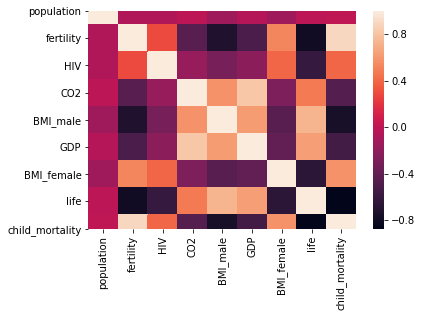

In [34]:
sns.heatmap(data.corr())


In [31]:
y = data['life'].values

X = data['fertility'].values



# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

y = y.reshape(-1,1)
X = X.reshape(-1,1)




Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


0.6192442167740035


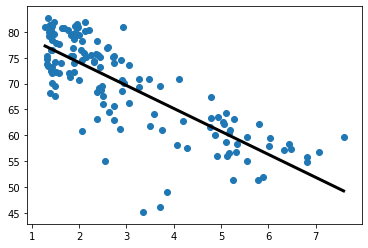

In [32]:
from sklearn.linear_model import LinearRegression 
reg =LinearRegression()
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
reg.fit(X,y)
y_pred = reg.predict(prediction_space)
print(reg.score(X,y))
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X,y)
plt.show()

In [33]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()

reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 4.194027914110243


Root Mean Squared Error: 3.9325500386605943


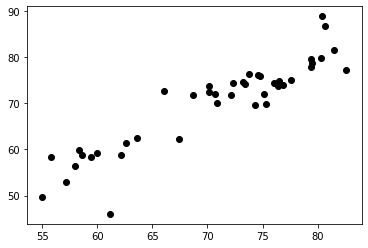

In [40]:
X=data[["HIV","fertility","BMI_male","GDP","BMI_female"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()

reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error: {}".format(rmse))
plt.scatter( y_test,y_pred, color='black', linewidth=1)


plt.show()


In [41]:
print(reg_all.coef_)
print(reg_all.intercept_)

[[-8.34396801e-01 -1.92076078e+00  7.71846295e-01  1.23296269e-04
  -3.42808552e-01]]
[99.14889518]


In [46]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all,X,y,cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.79306072 0.82431596 0.87669344 0.71586864 0.8906018 ]
Average 5-Fold CV Score: 0.8201081094520166
